In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('data/lichess_db_puzzle.csv')

In [3]:
df.head()

,PuzzleId,FEN,Moves,Rating,RatingDeviation,Popularity,NbPlays,Themes,GameUrl,OpeningTags
0,00008,r6k/pp2r2p/4Rp1Q/3p4/8/1N1P2R1/PqP2bPP/7K b - ...,f2g3 e6e7 b2b1 b3c1 b1c1 h6c1,1995,76,94,5553,crushing hangingPiece long middlegame,https://lichess.org/787zsVup/black#47,NaN
1,0000D,5rk1/1p3ppp/pq3b2/8/8/1P1Q1N2/P4PPP/3R2K1 w - ...,d3d6 f8d8 d6d8 f6d8,1452,73,96,25468,advantage endgame short,https://lichess.org/F8M8OS71#52,NaN
2,0008Q,8/4R3/1p2P3/p4r2/P6p/1P3Pk1/4K3/8 w - - 1 64,e7f7 f5e5 e2f1 e5e6,1276,76,90,498,advantage endgame rookEndgame short,https://lichess.org/MQSyb3KW#126,NaN
3,0009B,r2qr1k1/b1p2ppp/pp4n1/P1P1p3/4P1n1/B2P2Pb/3NBP...,b6c5 e2g4 h3g4 d1g4,1099,74,87,560,advantage middlegame short,https://lichess.org/4MWQCxQ6/black#31,Kings_Pawn_Game Kings_Pawn_Game_Leonardis_Vari...
4,000Vc,8/8/4k1p1/2KpP2p/5PP1/8/8/8 w - - 0 53,g4h5 g6h5 f4f5 e6e5 f5f6 e5f6,1556,81,73,90,crushing endgame long pawnEndgame,https://lichess.org/l6AejDMO#104,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3764379 entries, 0 to 3764378
Data columns (total 10 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   PuzzleId         object
 1   FEN              object
 2   Moves            object
 3   Rating           int64 
 4   RatingDeviation  int64 
 5   Popularity       int64 
 6   NbPlays          int64 
 7   Themes           object
 8   GameUrl          object
 9   OpeningTags      object
dtypes: int64(4), object(6)
memory usage: 287.2+ MB


In [5]:
df.shape

(3764379, 10)

In [6]:
df.describe()

,Rating,RatingDeviation,Popularity,NbPlays
count,3.764379e+06,3.764379e+06,3.764379e+06,3.764379e+06
mean,1.520251e+03,9.051031e+01,8.343254e+01,1.641598e+03
std,5.410730e+02,4.412472e+01,2.161519e+01,4.384180e+03
min,3.990000e+02,4.900000e+01,-1.000000e+02,0.000000e+00
25%,1.090000e+03,7.500000e+01,8.200000e+01,9.200000e+01
50%,1.484000e+03,7.800000e+01,8.900000e+01,3.660000e+02
75%,1.920000e+03,8.800000e+01,9.300000e+01,1.304000e+03
max,3.330000e+03,5.000000e+02,1.010000e+02,1.007612e+06


In [7]:
df.isna().sum() 

PuzzleId                 0
FEN                      0
Moves                    0
Rating                   0
RatingDeviation          0
Popularity               0
NbPlays                  0
Themes                   0
GameUrl                  0
OpeningTags        2928555
dtype: int64

In [8]:
# Derive unique themes
themes = df['Themes'].str.split()
themes_flat = [theme for sublist in themes for theme in sublist]
unique_themes = pd.Series(themes_flat).value_counts()

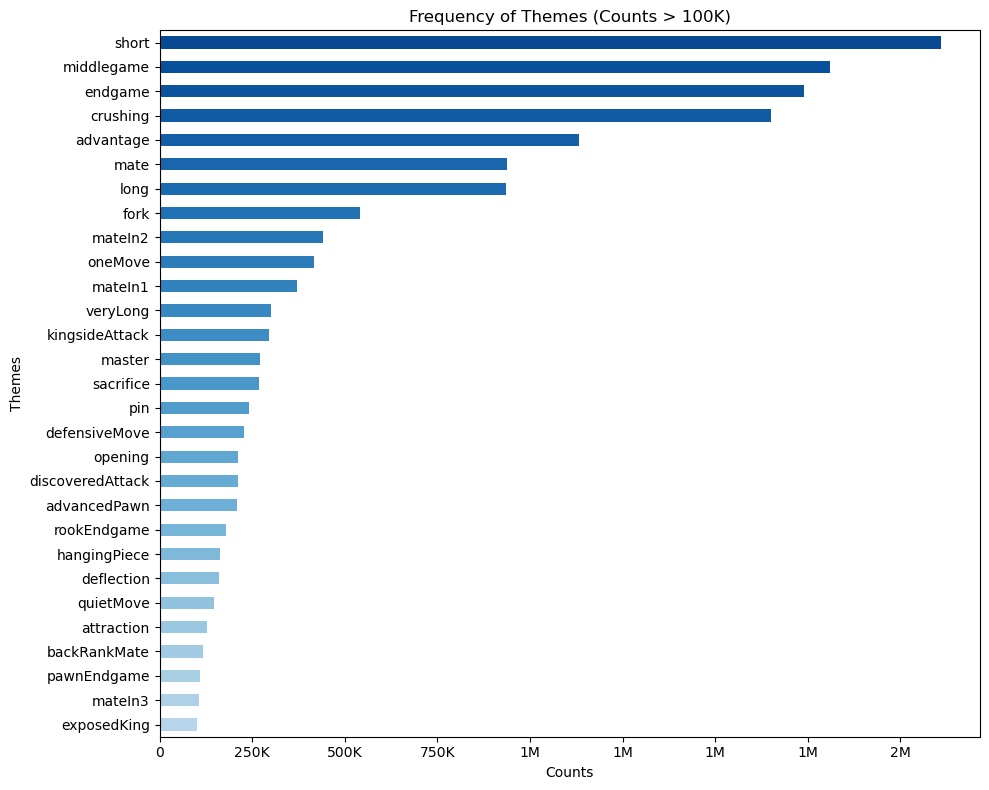

In [9]:
# Convert to large numbers
def millions_formatter(x, pos):
    return f'{int(x/1_000_000)}M' if x >= 1_000_000 else f'{int(x/1_000)}K' if x >= 1_000 else int(x)

# Show only themes with counts above 100,000
filtered_themes = unique_themes[unique_themes > 100_000]

colors = plt.cm.Blues(np.linspace(0.3, 0.9, len(filtered_themes)))

plt.figure(figsize=(10, 8))
ax = filtered_themes.sort_values().plot(kind='barh', color=colors)
ax.xaxis.set_major_formatter(FuncFormatter(millions_formatter))  
plt.title('Frequency of Themes (Counts > 100K)')
plt.xlabel('Counts')
plt.ylabel('Themes')
plt.tight_layout()  
plt.show()

<Figure size 1000x600 with 0 Axes>

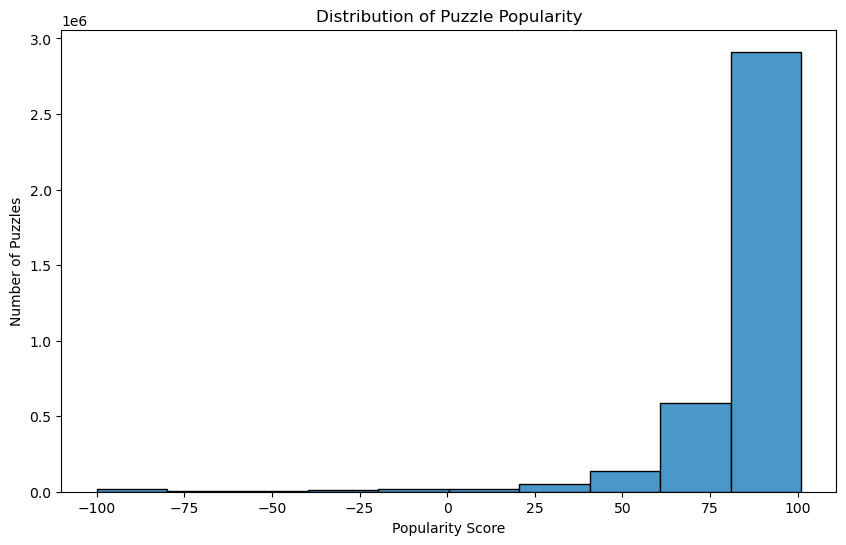

In [10]:
plt.figure(figsize=(10, 6))
color = plt.cm.Blues(0.6) 
plt.hist(df['Popularity'], bins=10, color=color, edgecolor='black')  
plt.title('Distribution of Puzzle Popularity')
plt.xlabel('Popularity Score')
plt.ylabel('Number of Puzzles')
plt.show()

In [11]:
df['OpeningTags'] = df['OpeningTags'].str.split(' ').str[0]

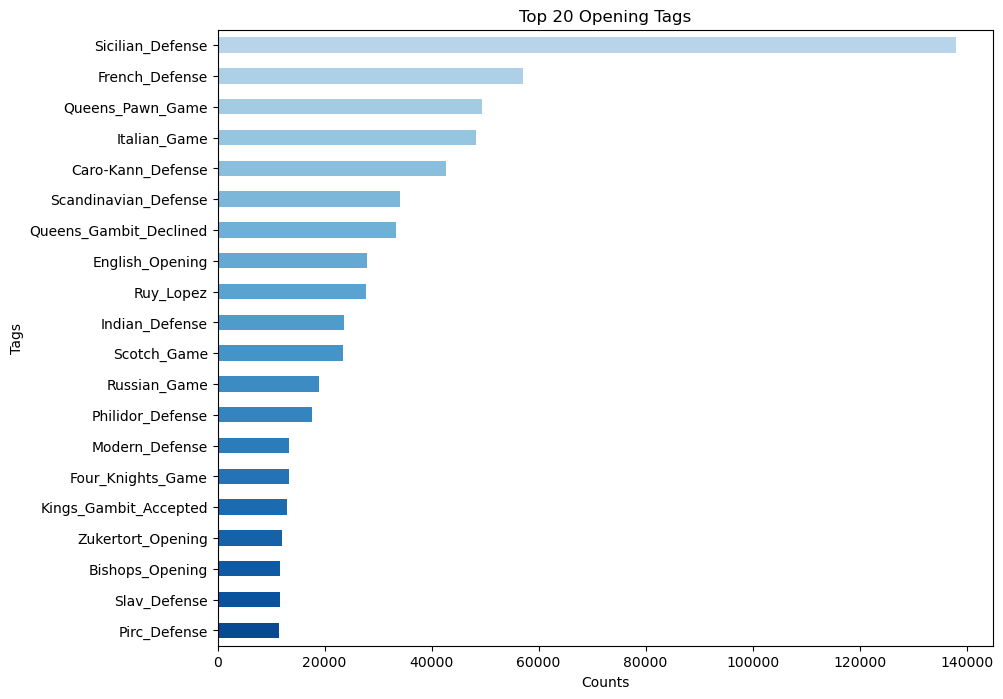

In [12]:

tags = df['OpeningTags'].value_counts()
top_tags = tags.nlargest(20) 

colors = plt.cm.Blues(np.linspace(0.3, 0.9, len(top_tags)))

plt.figure(figsize=(10, 8))
top_tags.plot(kind='barh', color=colors)
plt.title('Top 20 Opening Tags')
plt.xlabel('Counts')
plt.ylabel('Tags')
plt.gca().invert_yaxis() 
plt.show()

In [13]:
len(tags)

152

In [14]:
tags

Sicilian_Defense     137964
French_Defense        57017
Queens_Pawn_Game      49345
Italian_Game          48366
Caro-Kann_Defense     42592
                      ...  
Colle_System              2
Amsterdam_Attack          1
Amar_Gambit               1
Zaire_Defense             1
Formation                 1
Name: OpeningTags, Length: 152, dtype: int64

In [11]:
covered_themes = ["advancedPawn", "advantage", "attackingF2F7", "bishopEndgame", "castling", "crushing", "doubleCheck", "enPassant", "endgame", "equality","hangingPiece",
"knightEndgame",
"long",
"master",
"masterVsMaster",
"mate",
"mateIn1",
"mateIn2",
"mateIn3",
"mateIn4",
"mateIn5",
"middlegame",
"oneMove",
"opening",
"pawnEndgame",
"promotion",
"queenEndgame",
"queenRookEndgame",
"rookEndgame",
"short",
"superGM",
"underPromotion",
"veryLong"]

In [19]:
theme_counts = unique_themes.sum()

covered_occurrences = unique_themes[covered_themes].sum()
covered_percentage = covered_occurrences / theme_counts * 100
print(covered_percentage)


NameError: name 'covered_themes' is not defined

In [14]:
puzzle_count = df.shape[0]

covered_themes_count = df['Themes'].str.split().apply(lambda x: any(tag in x for tag in covered_themes)).sum()
percentage = covered_themes_count / puzzle_count * 100
print(percentage)

100.0
